In [20]:
import seaborn as sns
from sims import *
import pandas as pd
import matplotlib.pyplot as plt

# ATE

In [21]:
linear = pd.read_pickle("./data/sim_results_covarfixed_lin.pkl")
sig = pd.read_pickle("./data/sim_results_covarfixed_sig.pkl")
kcl = pd.read_pickle("./data/sim_results_covarfixed_k.pkl")

FileNotFoundError: [Errno 2] No such file or directory: './data/sim_results_covarfixed_lin.pkl'

In [ ]:
alpha = .05

sim_pvals = pd.concat([linear, sig, kcl], axis=0)

sim_pvals_long = pd.melt(sim_pvals, id_vars=["Simulation", "#Samples", "Dimensionality", "Balance", "Effect Size", "i"],
                        value_vars=["cMANOVA", "CoDITE", "cDCorr", "DCorr", "Causal cMANOVA", "Causal CoDITE", "Causal cDCorr", "Causal DCorr"],
                        var_name="Statistic", value_name="p-value")

sim_pvals_long["p-value"] = sim_pvals_long["p-value"].fillna(np.nan)
sim_pvals_long["Statistical Power"] = np.where(~np.isnan(sim_pvals_long["p-value"]),
                                     (sim_pvals_long["p-value"] < alpha).astype(float), 
                                     np.nan)
sim_pvals_long["Statistic"] = sim_pvals_long["Statistic"].replace("CoDITE", "KernelCDTest")
sim_pvals_long["Statistic"] = sim_pvals_long["Statistic"].replace("Causal CoDITE", "Causal KernelCDTest")
sim_pvals_long.tail()

In [22]:

sim_powers = sim_pvals_long.groupby(
    ["Simulation", "Dimensionality", "Balance", "Effect Size", "Statistic"]
).agg({"Statistical Power" : np.mean}).reset_index()
sim_powers = sim_powers[sim_powers["Statistic"] != "Causal KernelCDTest"]
sim_powers.head()

,Simulation,Dimensionality,Balance,Effect Size,Statistic,Statistical Power
0,Function,10,0.4,0.0,Causal DCorr,0.235
2,Function,10,0.4,0.0,Causal cDCorr,0.065
3,Function,10,0.4,0.0,Causal cMANOVA,NaN
4,Function,10,0.4,0.0,DCorr,1.000
5,Function,10,0.4,0.0,KernelCDTest,0.025


In [23]:
sim_powers["Setting"] = "p=" + sim_powers["Dimensionality"].astype(str) + ", Balance=" + sim_powers["Balance"].astype(str)
sim_powers

,Simulation,Dimensionality,Balance,Effect Size,Statistic,Statistical Power,Setting
0,Function,10,0.4,0.0,Causal DCorr,0.235,"p=10, Balance=0.4"
2,Function,10,0.4,0.0,Causal cDCorr,0.065,"p=10, Balance=0.4"
3,Function,10,0.4,0.0,Causal cMANOVA,NaN,"p=10, Balance=0.4"
4,Function,10,0.4,0.0,DCorr,1.000,"p=10, Balance=0.4"
5,Function,10,0.4,0.0,KernelCDTest,0.025,"p=10, Balance=0.4"
...,...,...,...,...,...,...,...
1595,Sigmoidal,101,0.8,1.0,Causal cMANOVA,NaN,"p=101, Balance=0.8"
1596,Sigmoidal,101,0.8,1.0,DCorr,0.040,"p=101, Balance=0.8"
1597,Sigmoidal,101,0.8,1.0,KernelCDTest,0.990,"p=101, Balance=0.8"
1598,Sigmoidal,101,0.8,1.0,cDCorr,1.000,"p=101, Balance=0.8"


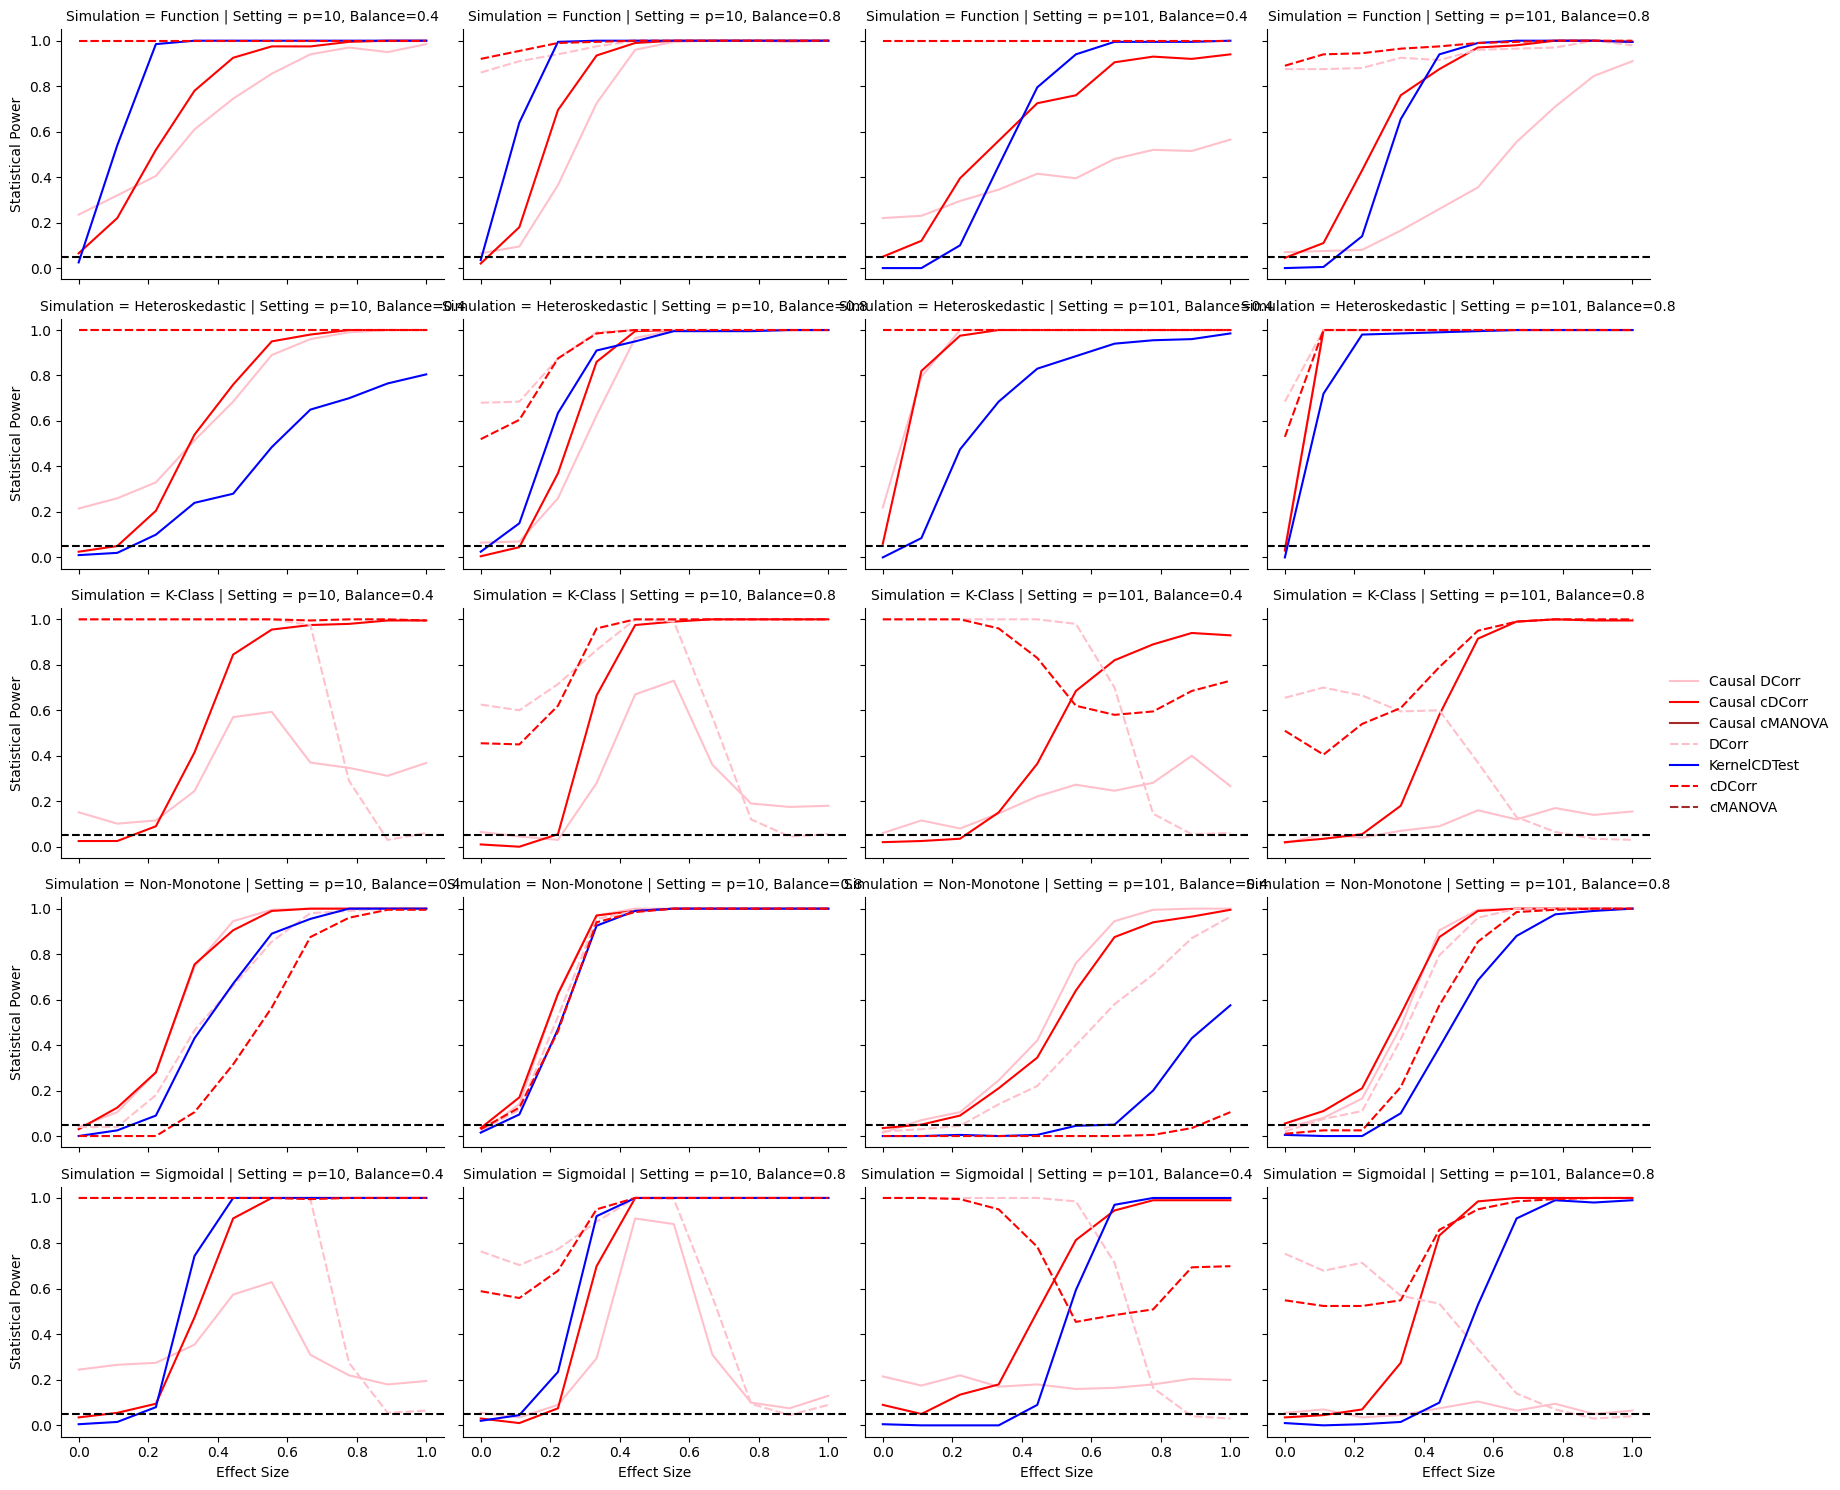

In [24]:
g = sns.FacetGrid(sim_powers, col="Setting", row="Simulation", aspect=1.4)
palette={"Causal cDCorr" : "red", "cDCorr" : "red",
         "Causal DCorr": "pink", "DCorr": "pink",
         "Causal KernelCDTest" : "blue", "KernelCDTest": "blue",
         "Causal cMANOVA": "brown", "cMANOVA": "brown"}

linestyles={"Causal cDCorr" : "", "cDCorr" : (4, 1.5),
         "Causal DCorr": "", "DCorr": (4, 1.5),
         "Causal KernelCDTest" : "", "KernelCDTest": "",
         "Causal cMANOVA": "", "cMANOVA": (4, 1.5)}
g.map_dataframe(sns.lineplot, x="Effect Size", y="Statistical Power", hue="Statistic", palette=palette, 
                style="Statistic", dashes=linestyles)
g.map(plt.axhline, y=alpha, ls="--", c="black")
g.add_legend();

# CATE

In [27]:
func = pd.read_pickle("./data/sim_results_covarfixed_cate_fn.pkl")
hetero = pd.read_pickle("./data/sim_results_covarfixed_cate_hetero.pkl")
kcl = pd.read_pickle("./data/sim_results_covarfixed_cate_kcl.pkl")
nm = pd.read_pickle("./data/sim_results_covarfixed_cate_nm.pkl")
sig = pd.read_pickle("./data/sim_results_covarfixed_cate_sig.pkl")

In [28]:
alpha = .05

sim_pvals = pd.concat([func, sig, kcl, hetero, nm, sig], axis=0)

sim_pvals_long = pd.melt(sim_pvals, id_vars=["Simulation", "#Samples", "Dimensionality", "Balance", "Effect Size", "i"],
                        value_vars=["cMANOVA", "KernelCDTest", "cDCorr", "DCorr", "Causal cMANOVA", "Causal KernelCDTest", "Causal cDCorr", "Causal DCorr"],
                        var_name="Statistic", value_name="p-value")

sim_pvals_long["p-value"] = sim_pvals_long["p-value"].fillna(np.nan)
sim_pvals_long["Statistical Power"] = np.where(~np.isnan(sim_pvals_long["p-value"]),
                                     (sim_pvals_long["p-value"] < alpha).astype(float), 
                                     np.nan)
#sim_pvals_long["Statistic"] = sim_pvals_long["Statistic"].replace("CoDITE", "KernelCDTest")
#sim_pvals_long["Statistic"] = sim_pvals_long["Statistic"].replace("Causal CoDITE", "Causal KernelCDTest")
sim_pvals_long.tail()

,Simulation,#Samples,Dimensionality,Balance,Effect Size,i,Statistic,p-value,Statistical Power
383995,Sigmoidal,100,101,0.8,1.0,195,Causal DCorr,0.692754,0.0
383996,Sigmoidal,100,101,0.8,1.0,196,Causal DCorr,0.076580,0.0
383997,Sigmoidal,100,101,0.8,1.0,197,Causal DCorr,0.087109,0.0
383998,Sigmoidal,100,101,0.8,1.0,198,Causal DCorr,0.243129,0.0
383999,Sigmoidal,100,101,0.8,1.0,199,Causal DCorr,0.231468,0.0


In [29]:
sim_powers = sim_pvals_long.groupby(
    ["Simulation", "Dimensionality", "Balance", "Effect Size", "Statistic"]
).agg({"Statistical Power" : np.mean}).reset_index()
sim_powers = sim_powers[sim_powers["Statistic"] != "Causal KernelCDTest"]
sim_powers.head()

,Simulation,Dimensionality,Balance,Effect Size,Statistic,Statistical Power
0,Function,10,0.4,0.0,Causal DCorr,0.285
2,Function,10,0.4,0.0,Causal cDCorr,0.045
3,Function,10,0.4,0.0,Causal cMANOVA,0.060
4,Function,10,0.4,0.0,DCorr,1.000
5,Function,10,0.4,0.0,KernelCDTest,0.020


In [30]:
sim_powers["Setting"] = "p=" + sim_powers["Dimensionality"].astype(str) + ", Balance=" + sim_powers["Balance"].astype(str)
sim_powers

,Simulation,Dimensionality,Balance,Effect Size,Statistic,Statistical Power,Setting
0,Function,10,0.4,0.0,Causal DCorr,0.285,"p=10, Balance=0.4"
2,Function,10,0.4,0.0,Causal cDCorr,0.045,"p=10, Balance=0.4"
3,Function,10,0.4,0.0,Causal cMANOVA,0.060,"p=10, Balance=0.4"
4,Function,10,0.4,0.0,DCorr,1.000,"p=10, Balance=0.4"
5,Function,10,0.4,0.0,KernelCDTest,0.020,"p=10, Balance=0.4"
...,...,...,...,...,...,...,...
1595,Sigmoidal,101,0.8,1.0,Causal cMANOVA,NaN,"p=101, Balance=0.8"
1596,Sigmoidal,101,0.8,1.0,DCorr,0.015,"p=101, Balance=0.8"
1597,Sigmoidal,101,0.8,1.0,KernelCDTest,0.990,"p=101, Balance=0.8"
1598,Sigmoidal,101,0.8,1.0,cDCorr,1.000,"p=101, Balance=0.8"


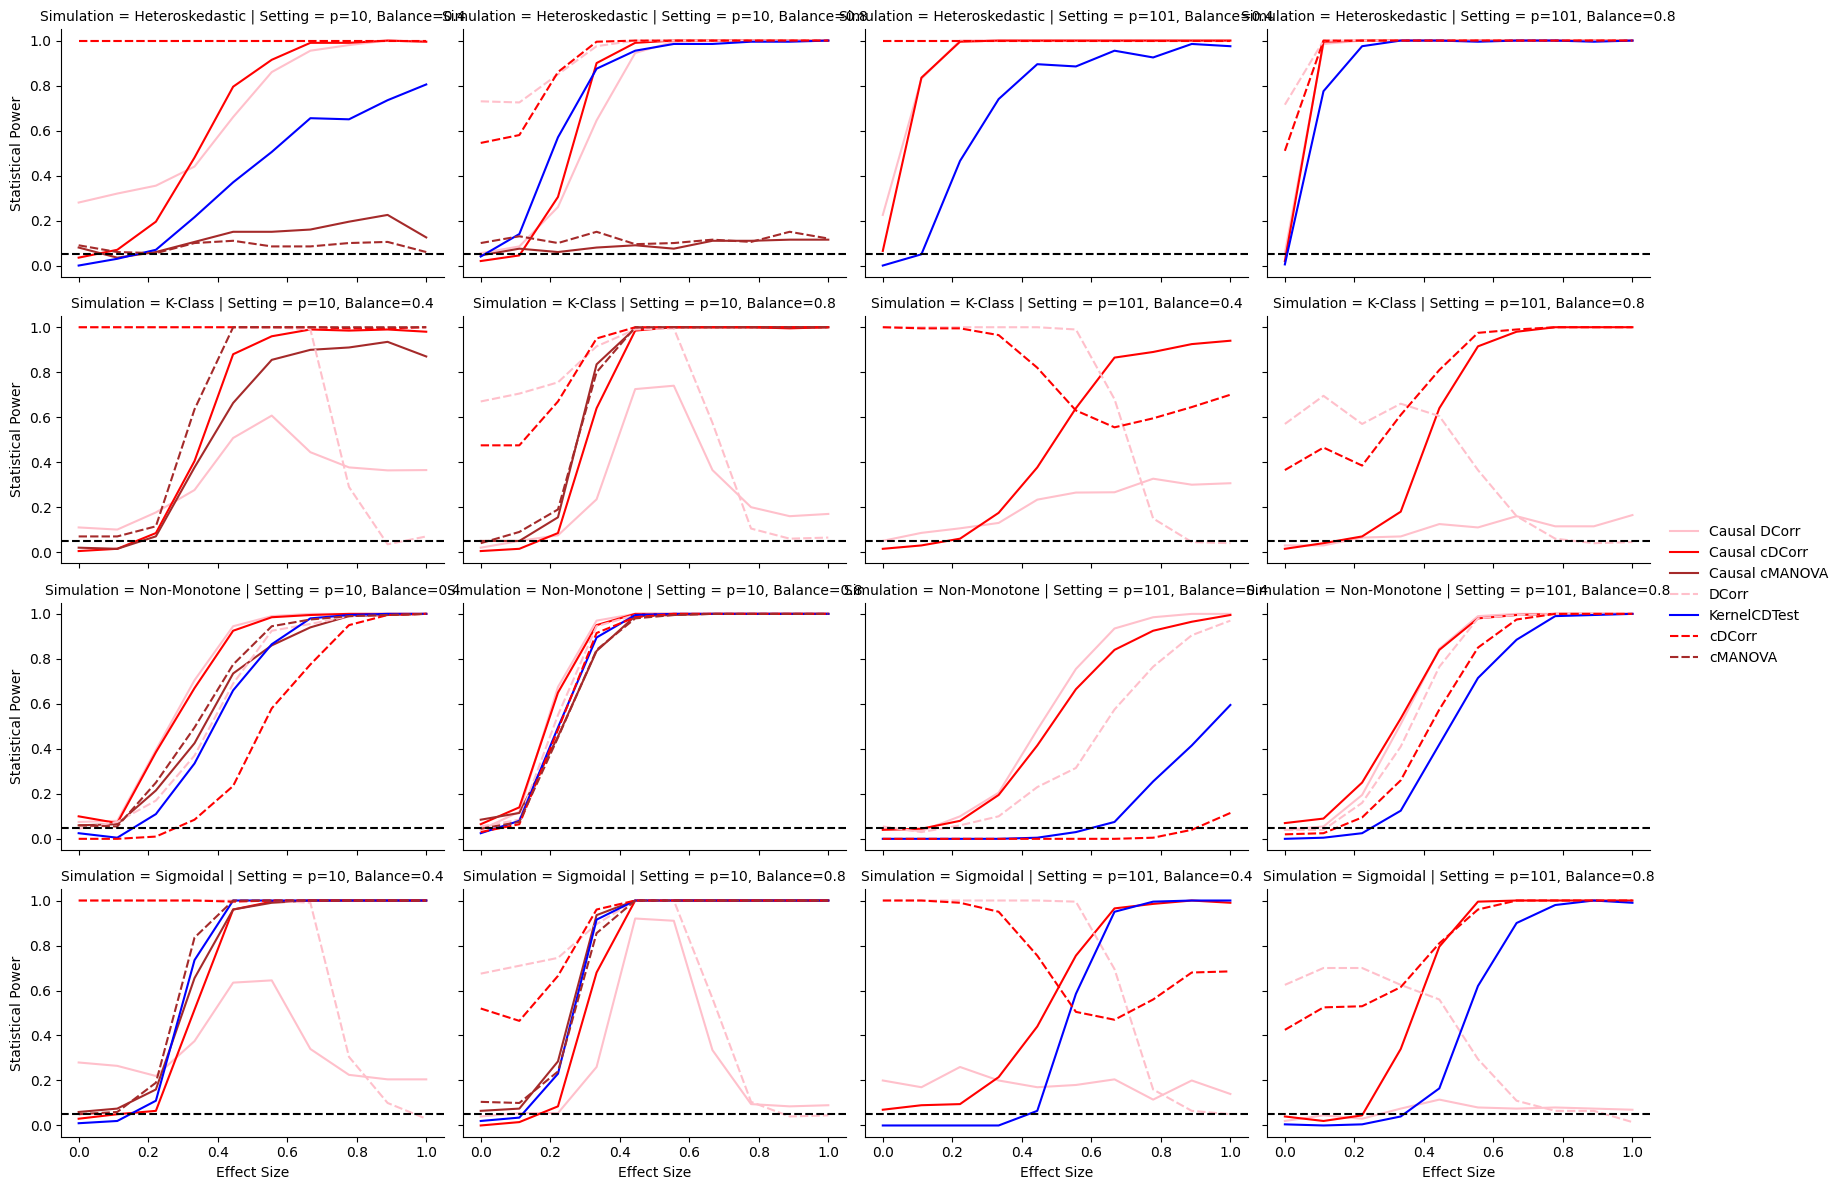

In [33]:
g = sns.FacetGrid(sim_powers[sim_powers["Simulation"] != "Function"], col="Setting", row="Simulation", aspect=1.4)
palette={"Causal cDCorr" : "red", "cDCorr" : "red",
         "Causal DCorr": "pink", "DCorr": "pink",
         "Causal KernelCDTest" : "blue", "KernelCDTest": "blue",
         "Causal cMANOVA": "brown", "cMANOVA": "brown"}

linestyles={"Causal cDCorr" : "", "cDCorr" : (4, 1.5),
         "Causal DCorr": "", "DCorr": (4, 1.5),
         "Causal KernelCDTest" : "", "KernelCDTest": "",
         "Causal cMANOVA": "", "cMANOVA": (4, 1.5)}
g.map_dataframe(sns.lineplot, x="Effect Size", y="Statistical Power", hue="Statistic", palette=palette, 
                style="Statistic", dashes=linestyles)
g.map(plt.axhline, y=alpha, ls="--", c="black")
g.add_legend();

In [34]:
g.savefig("./Figures/powers.pdf")